In [8]:
import gpflow as gp
import numpy as np
import pandas as pd
from gpflow.utilities import print_summary
import matplotlib.pyplot as plt
import random

In [6]:
data = pd.read_csv('svm.csv')

In [9]:
sample_index = random.sample(range(len(data)),32)

In [10]:
print(sample_index)

[688, 879, 886, 243, 332, 392, 1335, 1055, 1227, 1339, 28, 1224, 109, 798, 110, 524, 1200, 863, 341, 1088, 934, 57, 91, 1345, 1025, 1107, 1117, 844, 773, 458, 528, 161]


In [23]:
X = np.array([data.values[i,:3] for i in sample_index])
y = np.array([data.values[i,3] for i in sample_index]).reshape(32,1)

In [28]:
c = np.linspace(0,1,100)
model_evidence = []
k = gp.kernels.SquaredExponential()
def objective_closure():
    return - m1.log_marginal_likelihood()
for i in c:
    mean = gp.mean_functions.Constant(i)
    m1 = gp.models.GPR(data=(X,y), kernel = k, mean_function=mean, noise_variance=0.001)
    opt = gp.optimizers.Scipy()
    opt_logs = opt.minimize(objective_closure,
                            m1.trainable_variables,
                            options=dict(maxiter=100))
    model_evidence.append(m1.log_marginal_likelihood())

[<tf.Tensor: id=12883, shape=(), dtype=float64, numpy=45.54173963481176>, <tf.Tensor: id=17916, shape=(), dtype=float64, numpy=45.541739663179214>, <tf.Tensor: id=22676, shape=(), dtype=float64, numpy=45.54173964692119>, <tf.Tensor: id=28528, shape=(), dtype=float64, numpy=45.54173966454072>, <tf.Tensor: id=33834, shape=(), dtype=float64, numpy=45.54173970202433>, <tf.Tensor: id=39413, shape=(), dtype=float64, numpy=45.54173967796845>, <tf.Tensor: id=44992, shape=(), dtype=float64, numpy=45.54173959134938>, <tf.Tensor: id=50571, shape=(), dtype=float64, numpy=45.541739600053866>, <tf.Tensor: id=56696, shape=(), dtype=float64, numpy=45.54173963181154>, <tf.Tensor: id=66097, shape=(), dtype=float64, numpy=45.541739660240225>, <tf.Tensor: id=69219, shape=(), dtype=float64, numpy=45.54173941520715>, <tf.Tensor: id=74798, shape=(), dtype=float64, numpy=45.5417396184008>, <tf.Tensor: id=79558, shape=(), dtype=float64, numpy=45.54173963940825>, <tf.Tensor: id=84864, shape=(), dtype=float64, n

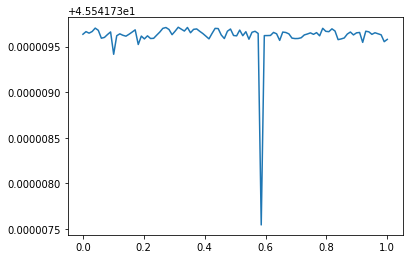

In [30]:
plt.plot(c, model_evidence)
print(model_evidence)